Predicting Hand-Written Digits

In this Jupyter Notebook, we will be using numpy, keras, and scikit-learn to predict which digit is contained in pictures of hand-written digits.

There will be four neural networks defined in this notebook. The former two will have a single hidden layer each, and the ladder two will have two hidden layers each.

First: We will create a Neural Network model with 100 nodes contained in its lone hidden layer...

In [1]:
## importing the mnist dataset, which contains 60,000 handwritten digits between 0 - 9
import numpy as np
np.random.seed(42) # for reproducibility
from keras.datasets import mnist
from keras.utils import to_categorical
import pylab as plt
import matplotlib.cm as cm

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# The following code grabs one example photo of a handwritten digit in the mnist dataset...
i = np.where(y_train==6)[0][0]
print("label: ", y_train[i])
sample = x_train[i, ...]
sample.shape
plt.imshow(sample, cmap=cm.gray)
plt.show()

Using TensorFlow backend.


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
label:  6


<Figure size 640x480 with 1 Axes>

In [2]:
# The data needs to be in a flat array for each sample, so we will reshape from 28 * 28 to 784
x_train = x_train.reshape(60000, 28*28)
print(x_train.shape)

# We will one-hot encode the labels
y_train = to_categorical(y_train)

(60000, 784)


In [3]:
print(y_train.shape)
print("label: ", y_train[i, :])

(60000, 10)
label:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [4]:
# Okay, now let's get a cross-validation set from the training data.
from sklearn.model_selection import train_test_split
x_train_part, x_train_val, y_train_part, y_train_val = \
    train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=np.argmax(y_train, axis=1
))

Now, I will import all the needed parts from the keras library. The models.Sequential() call will initialize an empty model for us to use to build our Neural Network. On the first add() function call, the first parameter specifies the amount of nodes that will be in the hidden layer. Also, the input_shape=(784,) parameter specfication inside of the first add function call is also important, because it is where the input data set size is set for our Neural Network model. This NN will only have a single hidden layer, so the second add() function call is specifying the output data set size. Our network will output a 1d array of size 10, and the predicted handwritten digit will be a 1, while all the other array values will be a zero.

In [5]:
from keras import models
from keras import layers
from keras import optimizers
#from keras import initializers

model1 = models.Sequential()
model1.add(layers.Dense(100, activation='relu',
                        #kernel_initializer=initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=42),
                        #bias_initializer='zeros',
                        input_shape=(784,)))
model1.add(layers.Dense(10, activation='softmax'))

# compile the model
model1.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


Now, I will fit the model. In the fit() function call, I specified the epochs parameter as 25. This means that the entire data set of 48000 photos will be iterated through 25 seperate times during the training process. Also, I set the batch size parameter to 1024. This means that for each epoch iteration, 1024 values repeatedly will be chosen randomly from the set of 48000 photos, until every photo has been chosen. This means that for each epoch, there will be around 46 batches, each with their own unique set of 1024 photos. By forcing the Neural Network to learn in chunks like this, we can make sure that we avoid memorization of data, and cut down on "Overfitting."

Overfitting is when Machine Learning models learn too well & memorize data. The reason we are using Epochs and Batches are to try to regularize our data.

In [6]:
# Now fit the model:
eps = 25
history = model1.fit(x_train_part,
                    y_train_part,
                    batch_size=1024,
                    epochs=eps,
                    validation_data=(x_train_val, y_train_val))

print("Training accuracy: {}".format(history.history['acc'][-1]))
print("Validation accuracy: {}".format(history.history['val_acc'][-1]))

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 1s 26us/step - loss: 10.9470 - acc: 0.3165 - val_loss: 9.3914 - val_acc: 0.4120
Epoch 2/25
48000/48000 [==============================] - 1s 17us/step - loss: 9.1168 - acc: 0.4308 - val_loss: 8.9903 - val_acc: 0.4394
Epoch 3/25
48000/48000 [==============================] - 1s 19us/step - loss: 8.8895 - acc: 0.4455 - val_loss: 8.7753 - val_acc: 0.4536
Epoch 4/25
48000/48000 [==============================] - 1s 18us/step - loss: 8.7738 - acc: 0.4533 - val_loss: 8.7176 - val_acc: 0.4574
Epoch 5/25
48000/48000 [==============================] - 1s 17us/step - loss: 8.1461 - acc: 0.4913 - val_loss: 7.5128 - val_acc: 0.5296
Epoch 6/25
48000/48000 [==============================] - 1s 20us/step - loss: 7.3496 - acc: 0.5407 - val_loss: 7.3036 - val_acc: 0.5442
Epoch 7/25
48000/48000 [==============================] - 1s 17us/step - loss: 

I will now plot the Training and Validation loss results from the Neural Network:

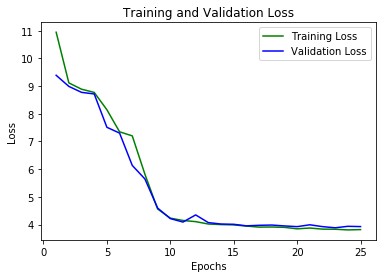

In [7]:
# plot the learning parameters
import matplotlib.pyplot as plt

loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, eps + 1)

plt.plot(epochs, loss_values, 'g', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Next, I will plot the Training Accuracy and the Validation Accuracy results from the Neural Network: 

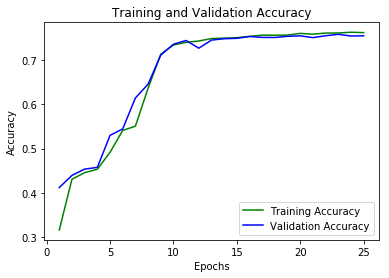

In [8]:
plt.clf() # clear the figure

acc_values = history.history['acc']
val_acc_values = history.history['val_acc']

plt.plot(epochs, acc_values, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [9]:
# Time to view the resulting confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model1.predict(x_test.reshape(10000, 28*28))
y_pred_test = np.argmax(y_pred, axis=1)

confusion_matrix(y_test, y_pred_test)

array([[ 971,    0,    0,    0,    2,    1,    1,    3,    2,    0],
       [   0,    0,   13,    0,    5,   22,    3,  225,  864,    3],
       [  12,    0,  981,    0,    5,    0,    1,   22,    9,    2],
       [  14,    0,  246,    0,    4,  500,    0,   40,  139,   67],
       [   1,    0,    2,    0,  941,    1,    7,    5,    7,   18],
       [   7,    0,    3,    0,    3,  868,    5,    1,    4,    1],
       [  22,    0,    6,    0,    3,   18,  896,    6,    7,    0],
       [   0,    0,   10,    0,    2,    1,    0, 1004,    7,    4],
       [   7,    0,    7,    0,    7,   15,    3,   16,  916,    3],
       [   8,    0,    5,    0,   19,    9,    0,   43,    7,  918]])

In [10]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       980
           1       0.00      0.00      0.00      1135
           2       0.77      0.95      0.85      1032
           3       0.00      0.00      0.00      1010
           4       0.95      0.96      0.95       982
           5       0.60      0.97      0.75       892
           6       0.98      0.94      0.96       958
           7       0.74      0.98      0.84      1028
           8       0.47      0.94      0.62       974
           9       0.90      0.91      0.91      1009

   micro avg       0.75      0.75      0.75     10000
   macro avg       0.63      0.76      0.68     10000
weighted avg       0.62      0.75      0.67     10000



/home/connerverret/test/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Next, I will create a Neural Network model with 400 nodes in the hidden layer:

In [11]:
model2 = models.Sequential()
model2.add(layers.Dense(400, activation='relu', input_shape=(784,)))
model2.add(layers.Dense(10, activation='softmax'))

# compile the model
model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Now I will fit the model:
eps = 25
history = model2.fit(x_train_part,
                    y_train_part,
                    batch_size=1024,
                    epochs=eps,
                    validation_data=(x_train_val, y_train_val))

print("Training accuracy: {}".format(history.history['acc'][-1]))
print("Validation accuracy: {}".format(history.history['val_acc'][-1]))

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 2s 44us/step - loss: 7.7855 - acc: 0.5131 - val_loss: 7.1094 - val_acc: 0.5567
Epoch 2/25
48000/48000 [==============================] - 2s 42us/step - loss: 5.9192 - acc: 0.6301 - val_loss: 5.6053 - val_acc: 0.6492
Epoch 3/25
48000/48000 [==============================] - 2s 41us/step - loss: 5.6262 - acc: 0.6484 - val_loss: 5.4784 - val_acc: 0.6583
Epoch 4/25
48000/48000 [==============================] - 2s 43us/step - loss: 5.5245 - acc: 0.6554 - val_loss: 5.4176 - val_acc: 0.6617
Epoch 5/25
48000/48000 [==============================] - 2s 43us/step - loss: 4.9878 - acc: 0.6879 - val_loss: 4.3415 - val_acc: 0.7277
Epoch 6/25
48000/48000 [==============================] - 2s 42us/step - loss: 4.1434 - acc: 0.7404 - val_loss: 3.9100 - val_acc: 0.7552
Epoch 7/25
48000/48000 [==============================] - 2s 42us/step - loss: 4.0286 - acc: 0.7480 - val_loss: 4.0175 - val_acc

I will now plot the Training and Validation loss results from the Neural Network:

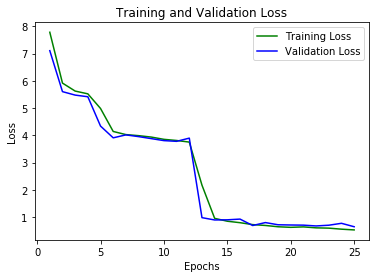

In [12]:
# plot the learning parameters
import matplotlib.pyplot as plt

loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, eps + 1)

plt.plot(epochs, loss_values, 'g', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Here, I plot the Training Accuracy and Validation Accuracy results from the Neural Network:

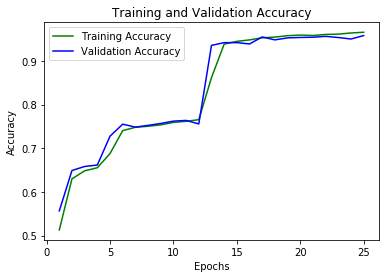

In [13]:
plt.clf() # clear the figure

acc_values = history.history['acc']
val_acc_values = history.history['val_acc']

plt.plot(epochs, acc_values, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Next, we will display the confusion matrix:

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model2.predict(x_test.reshape(10000, 28*28))
y_pred_test = np.argmax(y_pred, axis=1)

confusion_matrix(y_test, y_pred_test)

array([[ 963,    1,    3,    1,    0,    2,    8,    1,    1,    0],
       [   0, 1127,    2,    1,    0,    1,    3,    0,    1,    0],
       [   5,    3,  992,    7,    2,    0,    3,    4,   16,    0],
       [   0,    3,   11,  978,    0,    3,    1,    6,    4,    4],
       [   1,    5,   12,    0,  925,    3,    5,    2,    2,   27],
       [   6,    1,    2,   14,    2,  843,   14,    2,    7,    1],
       [   8,    4,    2,    0,    5,    3,  931,    1,    4,    0],
       [   0,   11,   18,    7,    1,    0,    0,  971,    1,   19],
       [   3,    5,    9,   24,    6,   16,   12,    4,  890,    5],
       [   8,   11,    2,   10,   18,    3,    1,    5,    3,  948]])

Now, I will display the classification matrix:

In [15]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.96      0.99      0.98      1135
           2       0.94      0.96      0.95      1032
           3       0.94      0.97      0.95      1010
           4       0.96      0.94      0.95       982
           5       0.96      0.95      0.95       892
           6       0.95      0.97      0.96       958
           7       0.97      0.94      0.96      1028
           8       0.96      0.91      0.94       974
           9       0.94      0.94      0.94      1009

   micro avg       0.96      0.96      0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



The next Neural Network model will contain 2 hidden layers, each with 200 nodes in it.

In [16]:
# 2 hidden layers
model3 = models.Sequential()
model3.add(layers.Dense(200, activation='relu', input_shape=(784,)))
model3.add(layers.Dense(200, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))

#compile the model
model3.compile(optimizer="rmsprop",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Fitting the model:
eps = 25
history = model3.fit(x_train_part,
                    y_train_part,
                    batch_size=1024,
                    epochs=eps,
                    validation_data=(x_train_val, y_train_val))

print("Training accuracy: {}".format(history.history['acc'][-1]))
print("Validation accuracy: {}".format(history.history['val_acc'][-1]))

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 6s 115us/step - loss: 5.4657 - acc: 0.6492 - val_loss: 3.4552 - val_acc: 0.7743
Epoch 2/25
48000/48000 [==============================] - 4s 93us/step - loss: 2.8649 - acc: 0.8138 - val_loss: 3.1973 - val_acc: 0.7923
Epoch 3/25
48000/48000 [==============================] - 2s 48us/step - loss: 2.5930 - acc: 0.8325 - val_loss: 2.5999 - val_acc: 0.8329
Epoch 4/25
48000/48000 [==============================] - 5s 94us/step - loss: 2.4072 - acc: 0.8449 - val_loss: 2.4310 - val_acc: 0.8453
Epoch 5/25
48000/48000 [==============================] - 5s 100us/step - loss: 2.2987 - acc: 0.8525 - val_loss: 2.3958 - val_acc: 0.8461
Epoch 6/25
48000/48000 [==============================] - 5s 94us/step - loss: 2.2529 - acc: 0.8563 - val_loss: 2.2256 - val_acc: 0.8572
Epoch 7/25
48000/48000 [==============================] - 4s 93us/step - loss: 2.1851 - acc: 0.8605 - val_loss: 2.1788 - val_a

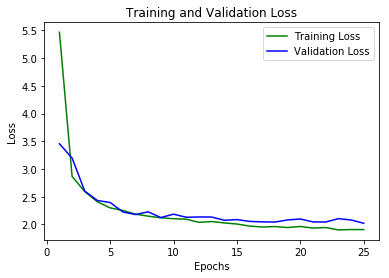

In [18]:
# plot the learning parameters
import matplotlib.pyplot as plt

loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, eps + 1)

plt.plot(epochs, loss_values, 'g', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

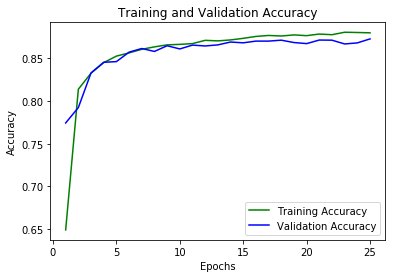

In [19]:
plt.clf()

acc_values = history.history['acc']
val_acc_values = history.history['val_acc']

plt.plot(epochs, acc_values, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [20]:
# Confusion Matrix
y_pred = model3.predict(x_test.reshape(10000, 28*28))
y_pred_test = np.argmax(y_pred, axis=1)

confusion_matrix(y_test, y_pred_test)

array([[ 963,    0,    0,    1,    0,    5,    4,    3,    3,    1],
       [   0, 1121,    4,    2,    0,    2,    2,    2,    2,    0],
       [   4,    1, 1004,    9,    0,    0,    6,    5,    3,    0],
       [   0,    0,    7,  990,    0,    6,    0,    4,    3,    0],
       [   2,   15,   23,    0,    0,   24,   68,   75,   25,  750],
       [   4,    0,    1,   27,    0,  847,    8,    1,    2,    2],
       [   8,    3,    0,    1,    0,    4,  936,    3,    2,    1],
       [   1,    7,    9,    1,    0,    1,    0, 1004,    1,    4],
       [   4,    1,    7,   26,    0,    6,    6,    5,  918,    1],
       [   3,    6,    0,   18,    0,    4,    3,   23,    6,  946]])

In [21]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.95      0.97      0.96      1032
           3       0.92      0.98      0.95      1010
           4       0.00      0.00      0.00       982
           5       0.94      0.95      0.95       892
           6       0.91      0.98      0.94       958
           7       0.89      0.98      0.93      1028
           8       0.95      0.94      0.95       974
           9       0.55      0.94      0.70      1009

   micro avg       0.87      0.87      0.87     10000
   macro avg       0.81      0.87      0.83     10000
weighted avg       0.81      0.87      0.84     10000



The next Neural Network model will contain 2 hidden layers. The first hidden layer will have 200 nodes in it and the 2nd hidden layer will have 100 nodes in it.

In [22]:
# 2 hidden layers
model4 = models.Sequential()
model4.add(layers.Dense(200, activation='relu', input_shape=(784,)))
model4.add(layers.Dense(100, activation='relu'))
model4.add(layers.Dense(10, activation='softmax'))

#compile the model
model4.compile(optimizer="rmsprop",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fitting the model:
eps = 25
history = model4.fit(x_train_part,
                    y_train_part,
                    batch_size=1024,
                    epochs=eps,
                    validation_data=(x_train_val, y_train_val))

print("Training accuracy: {}".format(history.history['acc'][-1]))
print("Validation accuracy: {}".format(history.history['val_acc'][-1]))

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 2s 33us/step - loss: 11.4886 - acc: 0.2853 - val_loss: 11.2435 - val_acc: 0.3013
Epoch 2/25
48000/48000 [==============================] - 1s 28us/step - loss: 10.3977 - acc: 0.3536 - val_loss: 9.7986 - val_acc: 0.3908
Epoch 3/25
48000/48000 [==============================] - 3s 69us/step - loss: 9.7753 - acc: 0.3925 - val_loss: 9.7610 - val_acc: 0.3935
Epoch 4/25
48000/48000 [==============================] - 4s 84us/step - loss: 9.7571 - acc: 0.3939 - val_loss: 9.7514 - val_acc: 0.3941
Epoch 5/25
48000/48000 [==============================] - 4s 84us/step - loss: 9.7207 - acc: 0.3965 - val_loss: 9.7240 - val_acc: 0.3964
Epoch 6/25
48000/48000 [==============================] - 4s 85us/step - loss: 9.7293 - acc: 0.3957 - val_loss: 9.7127 - val_acc: 0.3971
Epoch 7/25
48000/48000 [==============================] - 4s 75us/step - loss: 9.7166 - acc: 0.3966 - val_loss: 9.7098 - val_

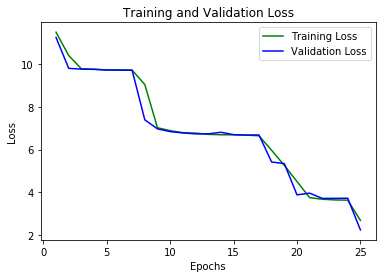

In [23]:
# plot the learning parameters
import matplotlib.pyplot as plt

loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, eps + 1)

plt.plot(epochs, loss_values, 'g', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

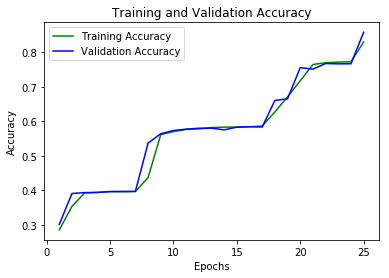

In [24]:
plt.clf()

acc_values = history.history['acc']
val_acc_values = history.history['val_acc']

plt.plot(epochs, acc_values, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [25]:
# Confusion Matrix
y_pred = model4.predict(x_test.reshape(10000, 28*28))
y_pred_test = np.argmax(y_pred, axis=1)

confusion_matrix(y_test, y_pred_test)

array([[ 964,    0,    0,    0,    0,    2,    7,    1,    5,    1],
       [   0, 1112,    4,    0,    0,    1,    6,    1,   11,    0],
       [  11,    2,  953,    0,    4,    0,   24,    9,   28,    1],
       [  12,   18,   58,    0,    2,  322,   26,   12,  417,  143],
       [   0,    0,    1,    0,  935,    0,   16,    1,    5,   24],
       [  11,    0,    0,    0,    3,  851,   12,    1,    9,    5],
       [  11,    4,    1,    0,   12,   23,  897,    0,   10,    0],
       [   0,    7,   13,    0,    1,    1,    5,  969,    8,   24],
       [   7,    0,    1,    0,    5,   13,    4,    2,  930,   12],
       [   4,    4,    0,    0,    9,    4,    1,    3,   13,  971]])

In [26]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.92      0.92      0.92      1032
           3       0.00      0.00      0.00      1010
           4       0.96      0.95      0.96       982
           5       0.70      0.95      0.81       892
           6       0.90      0.94      0.92       958
           7       0.97      0.94      0.96      1028
           8       0.65      0.95      0.77       974
           9       0.82      0.96      0.89      1009

   micro avg       0.86      0.86      0.86     10000
   macro avg       0.78      0.86      0.82     10000
weighted avg       0.79      0.86      0.82     10000



1. Which model gives the best accuracy? Which the best overall F1 score?
According to the results of my latest run, the model that gives the best accuracy is the model with a single hidden layer, that contains 400 nodes. It resulted with an F1 score of 0.96.

2. Which model gives the worst accuracy? Which the worst overall F1 score?
According to the results of my latest run, the model that gives the best accuracy is the model with a single hidden layer, that contains only 100 nodes. It resulted with an F1 score of 0.67.

3. What is the shape of the training set? How many nodes are in the input layer of the network?
The initial shape of the training set is 3 dimensions, 60000 by 28 by 28. However, in order to feed the data into the neural network as inputs, the data needs to be in a flat array. This is accomplished by calling reshape on the data, and making room in the 2nd dimension for 28 * 28 spots. This comes out to 784, for a new shape of 60000 by 784. 784 is how many nodes are in the input layer of the network.

4. Why do you think the best/worst networks are that way?
I believe that the Neural Network model that contains a single hidden layer with 400 nodes was the best network because it had the largest amount of nodes in its hidden layer. Because of the fact that our input layer had so many nodes (784), I think it was key to have a large hidden layer to prevent information bottlenecking. I hypothesize that a model with 2 hidden layers, each containing 400 nodes would have the most success as far as F1 score. Onto the worst network, it was the model that contained a single hidden layer with only 100 nodes. I believe that information bottleneck occurred during this model's training, because we were trying to "cram" 784 inputs through a hidden layer that only allowed for 100 spots.

5. Experiment and try to create a better performing network. Explain what you tried and document the results.
The 5th experimental Neural Network model below contains 2 hidden layers, the first with 400 nodes, and the second with 100 nodes, for a total of 500 nodes shared between the 2 hidden layers. I tried a lot of different variations before discovering this one, which had an f1 score of 0.96! I tried 2 hidden layers both with 350 nodes each and that was subpar, with a score of barely above 0.50, and I also tried a single hidden layer with 500 nodes in it, and while it had a score of 0.78, it was still very subpar compared to even a single hidden layer with 400 nodes in it.

In [42]:
model5 = models.Sequential()
model5.add(layers.Dense(400, activation='relu', input_shape=(784,)))
model5.add(layers.Dense(100, activation='relu'))
model5.add(layers.Dense(10, activation='softmax'))

# compile the model
model5.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Now I will fit the model:
eps = 25
history = model5.fit(x_train_part,
                    y_train_part,
                    batch_size=1024,
                    epochs=eps,
                    validation_data=(x_train_val, y_train_val))

print("Training accuracy: {}".format(history.history['acc'][-1]))
print("Validation accuracy: {}".format(history.history['val_acc'][-1]))

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 4s 79us/step - loss: 5.4032 - acc: 0.6567 - val_loss: 3.3116 - val_acc: 0.7882
Epoch 2/25
48000/48000 [==============================] - 3s 71us/step - loss: 2.9860 - acc: 0.8087 - val_loss: 3.3458 - val_acc: 0.7857
Epoch 3/25
48000/48000 [==============================] - 4s 74us/step - loss: 2.6499 - acc: 0.8312 - val_loss: 2.5706 - val_acc: 0.8360
Epoch 4/25
48000/48000 [==============================] - 3s 73us/step - loss: 2.4663 - acc: 0.8429 - val_loss: 2.5836 - val_acc: 0.8350
Epoch 5/25
48000/48000 [==============================] - 4s 73us/step - loss: 2.3813 - acc: 0.8490 - val_loss: 2.3152 - val_acc: 0.8524
Epoch 6/25
48000/48000 [==============================] - 4s 74us/step - loss: 2.2995 - acc: 0.8542 - val_loss: 2.4845 - val_acc: 0.8428
Epoch 7/25
48000/48000 [==============================] - 3s 73us/step - loss: 2.2703 - acc: 0.8564 - val_loss: 2.4644 - val_acc

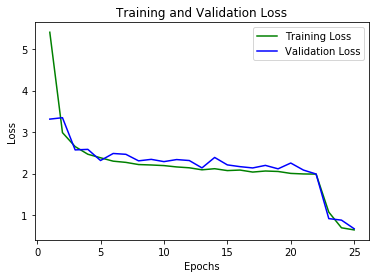

In [43]:
# plot the learning parameters
import matplotlib.pyplot as plt

loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, eps + 1)

plt.plot(epochs, loss_values, 'g', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

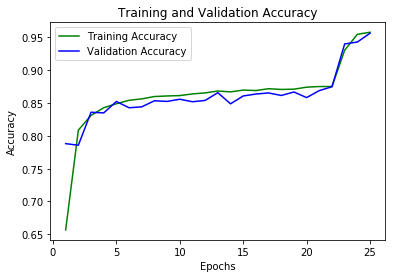

In [44]:
plt.clf()

acc_values = history.history['acc']
val_acc_values = history.history['val_acc']

plt.plot(epochs, acc_values, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [45]:
# Confusion Matrix
y_pred = model5.predict(x_test.reshape(10000, 28*28))
y_pred_test = np.argmax(y_pred, axis=1)

confusion_matrix(y_test, y_pred_test)

array([[ 963,    1,    1,    0,    0,    3,    3,    1,    6,    2],
       [   0, 1124,    4,    0,    0,    0,    2,    0,    5,    0],
       [   6,    2,  998,    0,    3,    1,    2,    7,   11,    2],
       [   0,    2,   25,  936,    1,   18,    0,    5,   12,   11],
       [   0,    0,    6,    0,  959,    0,    3,    0,    2,   12],
       [   3,    1,    1,   11,    3,  857,    5,    3,    5,    3],
       [   8,    2,    0,    1,    9,    5,  931,    0,    2,    0],
       [   1,    8,   14,    1,   10,    0,    0,  950,    1,   43],
       [   7,    3,    7,    4,    7,    4,    6,    4,  923,    9],
       [   4,    5,    0,    9,   37,   10,    1,   14,    3,  926]])

In [46]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.95      0.97      0.96      1032
           3       0.97      0.93      0.95      1010
           4       0.93      0.98      0.95       982
           5       0.95      0.96      0.96       892
           6       0.98      0.97      0.97       958
           7       0.97      0.92      0.94      1028
           8       0.95      0.95      0.95       974
           9       0.92      0.92      0.92      1009

   micro avg       0.96      0.96      0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

